In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
dataset = pd.read_csv('/content/winequality.csv')

In [36]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
dataset.shape

(1599, 12)

In [38]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [40]:
dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


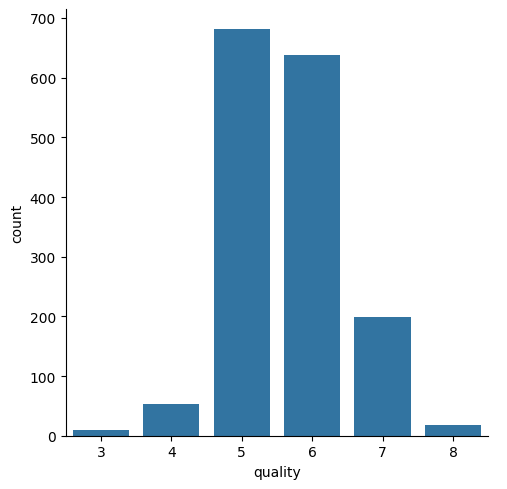

In [41]:
sns.catplot(x='quality', data=dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

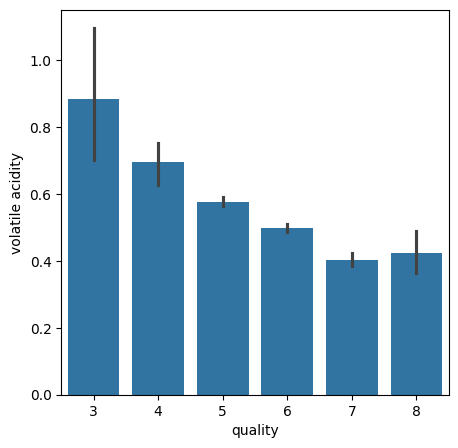

In [42]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

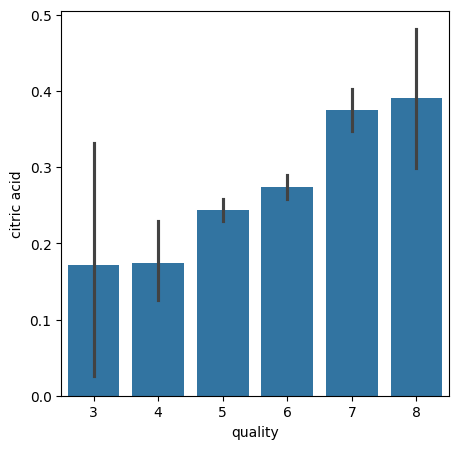

In [43]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

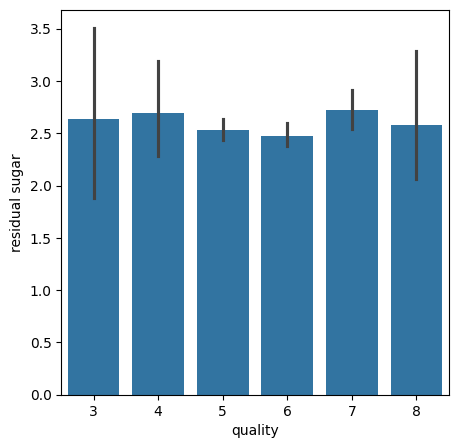

In [44]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

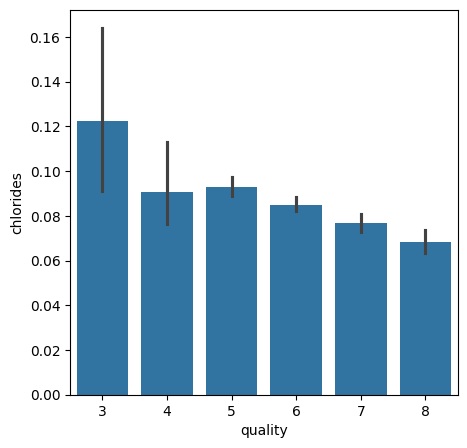

In [45]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=dataset)

In [46]:
corrilation = dataset.corr()

<Axes: >

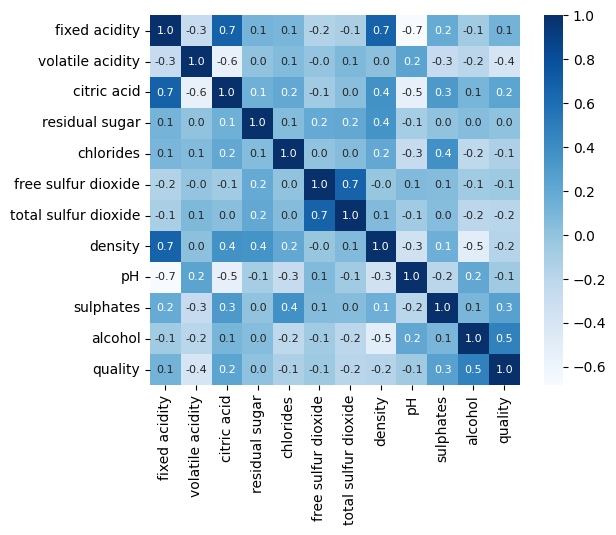

In [47]:
sns.heatmap(corrilation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [48]:
x = dataset.drop('quality', axis=1)

In [49]:
#binarization
y = dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [50]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,stratify =y, random_state=2)

In [52]:
model = RandomForestClassifier()

In [53]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
x_train_prediction = model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_prediction,y_train)
print(x_train_accuracy)

1.0


In [55]:
x_test_prediction = model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediction,y_test)
print(x_test_accuracy)

0.9375


In [74]:
new_data = (7.3,0.65,0.0,1.2,0.068,15.0,21.0,0.9946,3.39,0.47,10.0)
new_data = np.asarray(new_data)
new_data = new_data.reshape(-1,1)
new_data = new_data.T
prediction = model.predict(new_data)
if prediction == 1 : print("good wine")
else : print("bad wine")


good wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
